<a href="https://colab.research.google.com/github/BreadAbl/intensive-1/blob/main/%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("pars8k.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


In [ ]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.') #выведем кол-во строк и столбцов

Data has 8393 rows , 27 columns.


<Axes: >

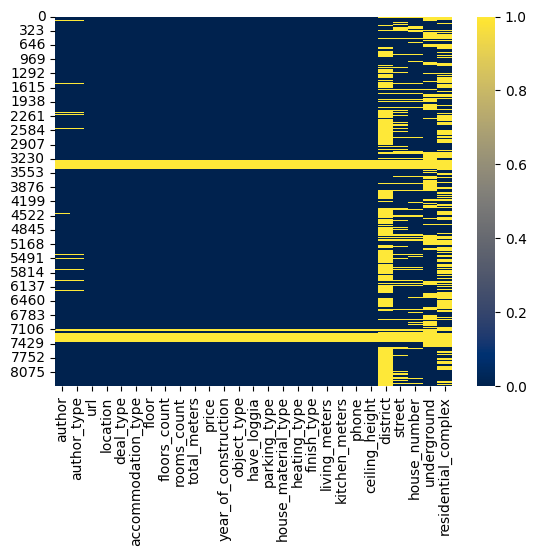

In [ ]:
sns.heatmap(df.isnull(),cmap='cividis') #посмотрим пропуски

In [ ]:
df.drop(['author'], axis=1,inplace=True)
print(f'Data after dropping col "ID" has  {df.shape[1]} columns.')

Data after dropping col "ID" has  26 columns.


In [ ]:
df.info() #посмотрим информацию о df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author_type           7595 non-null   object
 1   url                   7906 non-null   object
 2   location              7906 non-null   object
 3   deal_type             7906 non-null   object
 4   accommodation_type    7906 non-null   object
 5   floor                 7906 non-null   object
 6   floors_count          7906 non-null   object
 7   rooms_count           7906 non-null   object
 8   total_meters          7906 non-null   object
 9   price                 7893 non-null   object
 10  year_of_construction  7906 non-null   object
 11  object_type           7906 non-null   object
 12  have_loggia           7906 non-null   object
 13  parking_type          7906 non-null   object
 14  house_material_type   7906 non-null   object
 15  heating_type          7906 non-null   

In [ ]:
df.isnull().sum() #кол-во пропусков

,0
author_type,798
url,487
location,487
deal_type,487
accommodation_type,487
floor,487
floors_count,487
rooms_count,487
total_meters,487
price,500


# *Дроп NAN*

In [ ]:
print(df["district"].isnull().sum(),"-nulls in district")
print(df["underground"].isnull().sum(),"-nulls in underground")
print(df["residential_complex"].isnull().sum(),"-nulls in residential_complex")
print(df["street"].isnull().sum(),"-nulls in street")

4583 -nulls in district
2277 -nulls in underground
3778 -nulls in residential_complex
1575 -nulls in street


<Axes: >

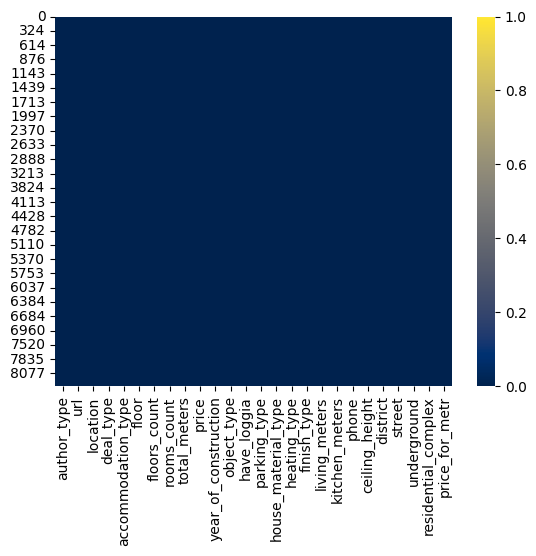

In [ ]:
sns.heatmap(df.isnull(), cmap = "cividis") #проверяем кол-во пропусков

# *Приведение* *типов*

In [ ]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors_count'] = pd.to_numeric(df['floors_count'], errors='coerce')
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='coerce')

In [ ]:
df['price_for_metr'] = round((df['price'] / df['total_meters']), 3)
df["price_for_metr"] #перевод данных в численные (которые должны таковыми являться)

,price_for_metr
0,113526.570
1,125757.576
2,121428.571
3,142857.143
4,115830.116
...,...
8388,163558.106
8389,178940.000
8390,162222.222
8391,188235.294


# *Поиск выбросов*

In [ ]:
print(df.loc[df['price_for_metr'].idxmax()])
print(df.loc[df['floors_count'].idxmax()])
print(df.loc[df['rooms_count'].idxmax()])

author_type                                            developer
url                     https://www.cian.ru/sale/flat/308564823/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                        5.0
floors_count                                                 5.0
rooms_count                                                  5.0
total_meters                                               590.3
price                                               2361200000.0
year_of_construction                                        2027
object_type                                          Новостройка
have_loggia                                                   -1
parking_type                                                  -1
house_material_type                                           -1
heating_type             

In [ ]:
df.drop(([df['rooms_count'].idxmax()]), axis = 0, inplace=True)
print(df.loc[df['rooms_count'].idxmax()])

author_type                                              realtor
url                     https://www.cian.ru/sale/flat/301450189/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                       26.0
floors_count                                                31.0
rooms_count                                                  5.0
total_meters                                               246.7
price                                                288063785.0
year_of_construction                                        2008
object_type                                             Вторичка
have_loggia                                            3 балкона
parking_type                                           Подземная
house_material_type                                           -1
heating_type             

In [ ]:
print(f"было {df.shape[0]} строк")
df.drop(df[df['rooms_count'] > 10].index, inplace=True)
print(f"стало {df.shape[0]} строк")
print(df.loc[df['rooms_count'].idxmax()])

было 8392 строк
стало 8392 строк
author_type                                              realtor
url                     https://www.cian.ru/sale/flat/301450189/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                       26.0
floors_count                                                31.0
rooms_count                                                  5.0
total_meters                                               246.7
price                                                288063785.0
year_of_construction                                        2008
object_type                                             Вторичка
have_loggia                                            3 балкона
parking_type                                           Подземная
house_material_type                                      

# *анализ* *данных*

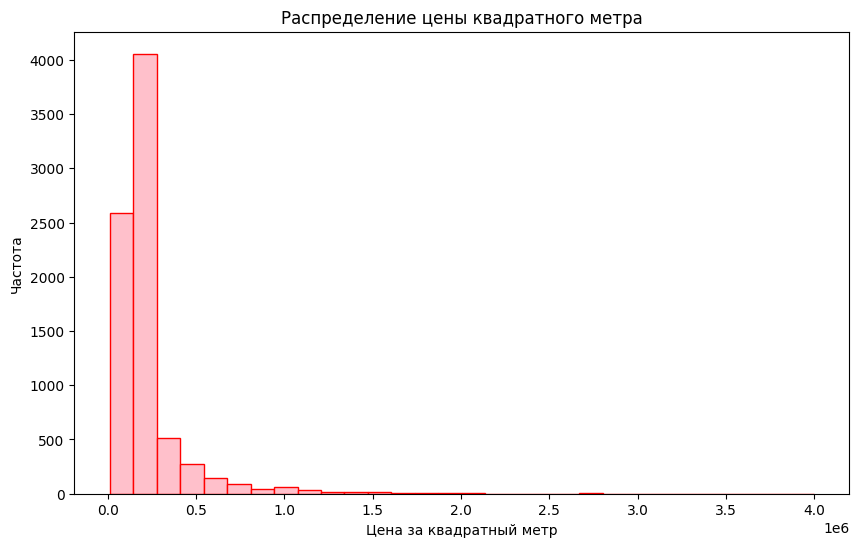

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_for_metr'], bins=30, color='pink', edgecolor='red')
plt.title('Распределение цены квадратного метра')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
plt.show()


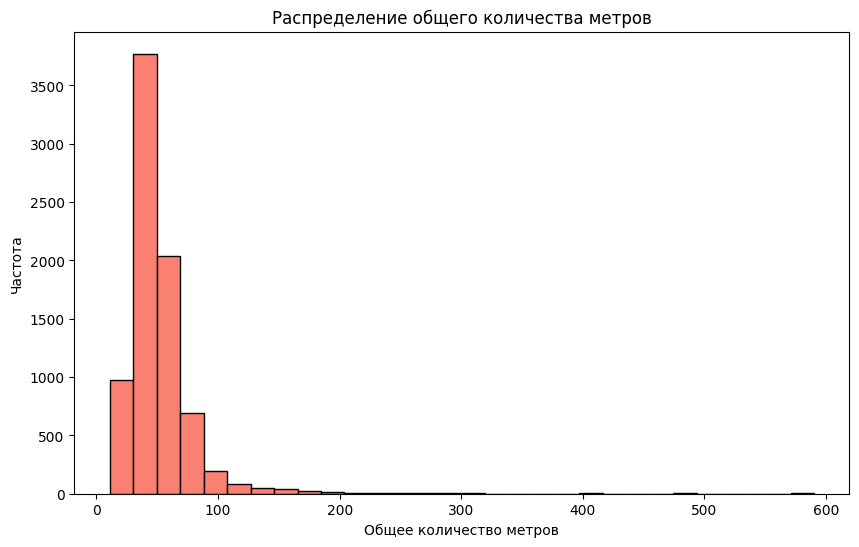

In [ ]:
# Пример для признака 'total_sqm' (общее количество метров)
plt.figure(figsize=(10, 6))
plt.hist(df['total_meters'], bins=30, color='salmon', edgecolor='black')
plt.title('Распределение общего количества метров')
plt.xlabel('Общее количество метров')
plt.ylabel('Частота')
plt.show()

In [ ]:
print(df.loc[df['total_meters'].idxmax()])

author_type                                            developer
url                     https://www.cian.ru/sale/flat/308564823/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                        5.0
floors_count                                                 5.0
rooms_count                                                  5.0
total_meters                                               590.3
price                                               2361200000.0
year_of_construction                                        2027
object_type                                          Новостройка
have_loggia                                                   -1
parking_type                                                  -1
house_material_type                                           -1
heating_type             

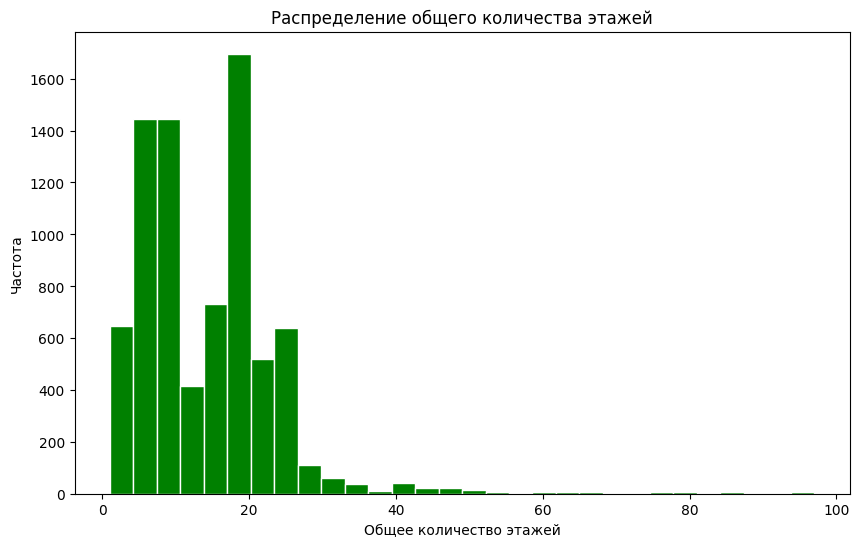

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['floors_count'], bins=30, color='green', edgecolor='white')
plt.title('Распределение общего количества этажей')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')
plt.show()

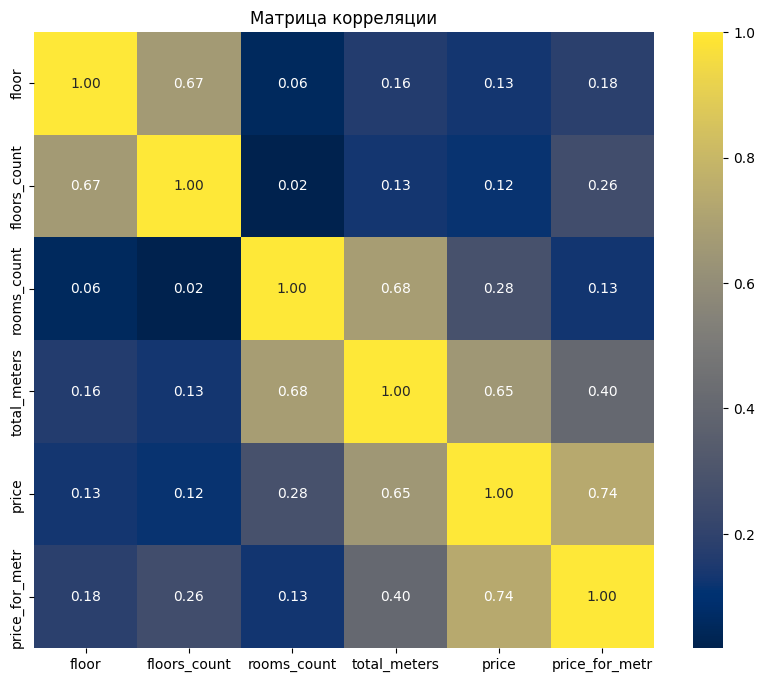

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

сильно влияют цена и площадь квартиры, немного меньше влияет количество комнат. На цену влияют площадь и кол-во комнат. этаж коррелируют количество этажей. Площадь коррелирует с колвом комнат и ценой.

# *Преобразование категориальных данных в числа*

In [ ]:
df.drop(['url'], axis=1,inplace=True) #не влияет
df.drop(['deal_type'], axis=1,inplace=True) #везде повторяются

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8392 entries, 0 to 8392
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author_type           8392 non-null   int64  
 1   location              8392 non-null   int64  
 2   accommodation_type    8392 non-null   int64  
 3   floor                 7904 non-null   float64
 4   floors_count          7904 non-null   float64
 5   rooms_count           7904 non-null   float64
 6   total_meters          7904 non-null   float64
 7   price                 7891 non-null   float64
 8   year_of_construction  8392 non-null   int64  
 9   object_type           8392 non-null   int64  
 10  have_loggia           8392 non-null   int64  
 11  parking_type          8392 non-null   int64  
 12  house_material_type   8392 non-null   int64  
 13  heating_type          8392 non-null   int64  
 14  finish_type           8392 non-null   int64  
 15  living_meters         8392

<ipython-input-23-e9815df47316>:7: RuntimeWarning: invalid value encountered in cast
  df[categorical_columns] = encoded_data.astype(int)


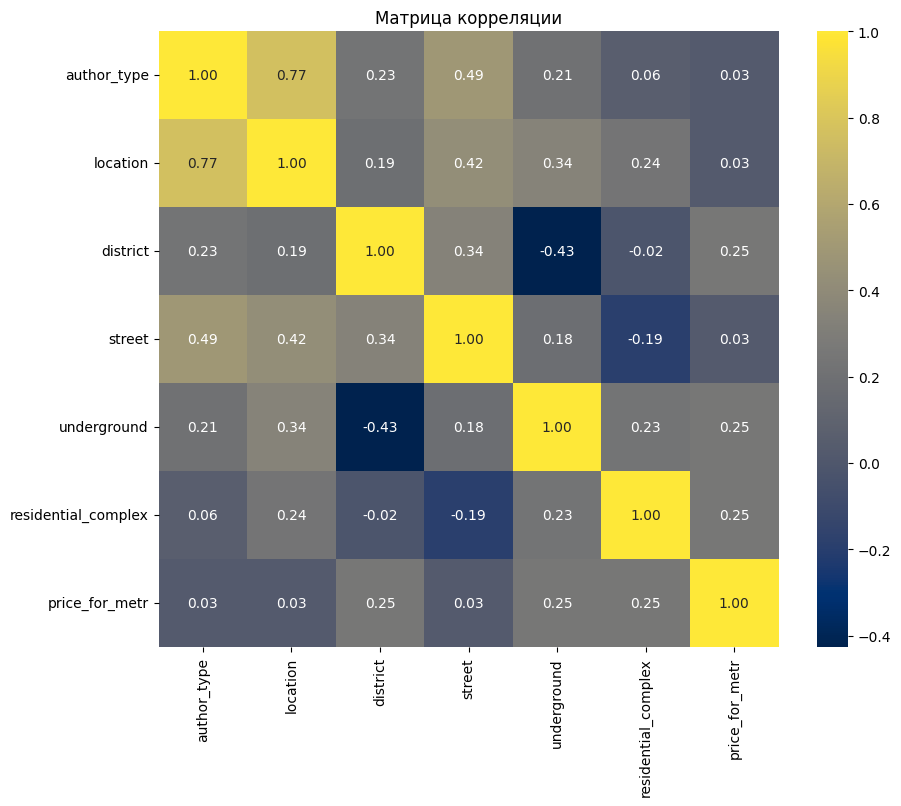

In [ ]:
numeric_cols = ["author_type",'location','district',"street","underground","residential_complex","price_for_metr"]

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()


на целевую переменную расположение коррелирует очень слабо